In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
inputs = tf.placeholder(tf.float32, [None, 3000], 'inputs')
targets = tf.placeholder(tf.float32, [None, 10], 'targets')

/afs/inf.ed.ac.uk/user/s16/s1607197/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def get_error_and_accuracy(data):
    """Calculate average error and classification accuracy across a dataset.
    
    Args:
        data: Data provider which iterates over input-target batches in dataset.
        
    Returns:
        Tuple with first element scalar value corresponding to average error
        across all batches in dataset and second value corresponding to
        average classification accuracy across all batches in dataset.
    """
    err = 0
    acc = 0
    for input_batch, target_batch in data:
        err += sess.run(error, feed_dict={inputs: input_batch, targets: target_batch})
        acc += sess.run(accuracy, feed_dict={inputs: input_batch, targets: target_batch})
    err /= data.num_batches
    acc /= data.num_batches
    return err, acc

In [3]:
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
#regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
#error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_100 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 8602.73 running acc average = 0.21
End of epoch 2: running error average = 3452.50 running acc average = 0.26
End of epoch 3: running error average = 2085.35 running acc average = 0.28
End of epoch 4: running error average = 1361.54 running acc average = 0.29
End of epoch 5: running error average = 890.80 running acc average = 0.30
End of epoch 6: running error average = 568.39 running acc average = 0.28
End of epoch 7: running error average = 263.95 running acc average = 0.23
End of epoch 8: running error average = 35.64 running acc average = 0.14
End of epoch 9: running error average = 9.62 running acc average = 0.12
End of epoch 10: running error average = 4.78 running acc average = 0.12
End of epoch 11: running error average = 3.52 running acc average = 0.11
End of epoch 12: running error average = 2.80 running acc average = 0.12
End of epoch 13: running error average = 2.53 running acc average = 0.11
End of epoch 14: running error average = 

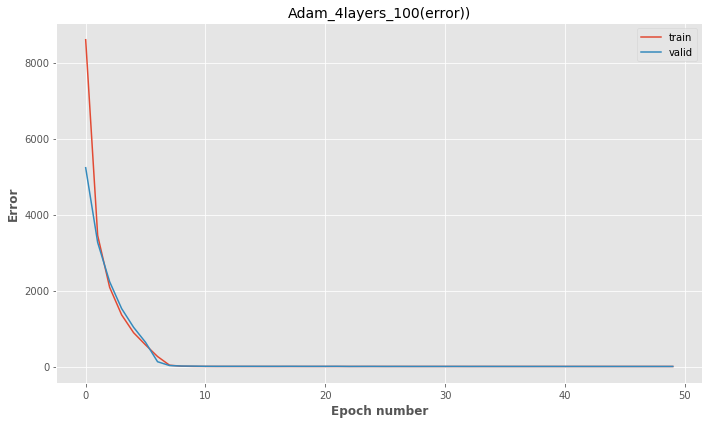

In [4]:
data = Adam_4layers_100

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100(error))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

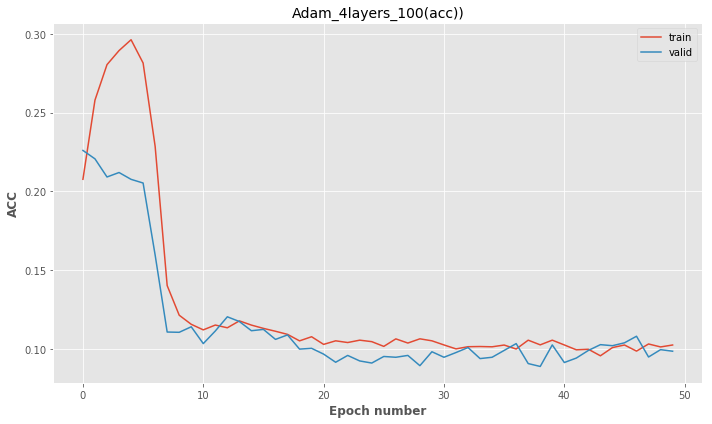

In [5]:
data = Adam_4layers_100

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100(acc))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

In [6]:
n_hidden_1 = 100
n_hidden_2 = 100
n_hidden_3 = 100
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['h3'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_100_L2 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 9607.96 running acc average = 0.20
End of epoch 2: running error average = 4650.85 running acc average = 0.25
End of epoch 3: running error average = 3307.36 running acc average = 0.27
End of epoch 4: running error average = 2647.65 running acc average = 0.28
End of epoch 5: running error average = 2265.72 running acc average = 0.28
End of epoch 6: running error average = 1998.03 running acc average = 0.29
End of epoch 7: running error average = 1810.56 running acc average = 0.30
End of epoch 8: running error average = 1680.36 running acc average = 0.29
End of epoch 9: running error average = 1568.91 running acc average = 0.29
End of epoch 10: running error average = 1468.93 running acc average = 0.28
End of epoch 11: running error average = 1371.29 running acc average = 0.24
End of epoch 12: running error average = 1275.23 running acc average = 0.20
End of epoch 13: running error average = 1179.35 running acc average = 0.19
End of epoch 14: runn

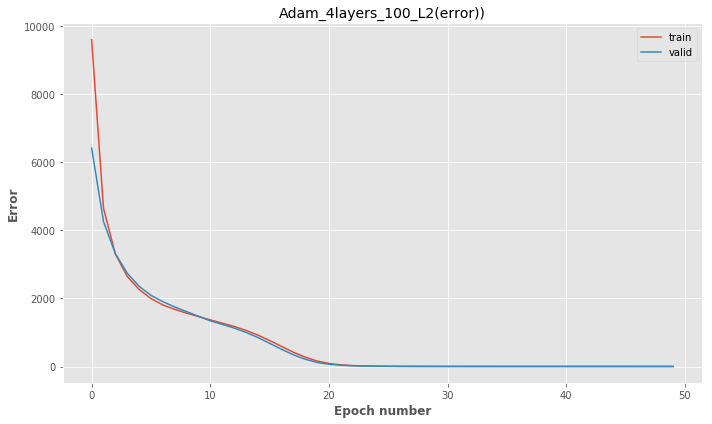

In [7]:
data = Adam_4layers_100_L2

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100_L2(error))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

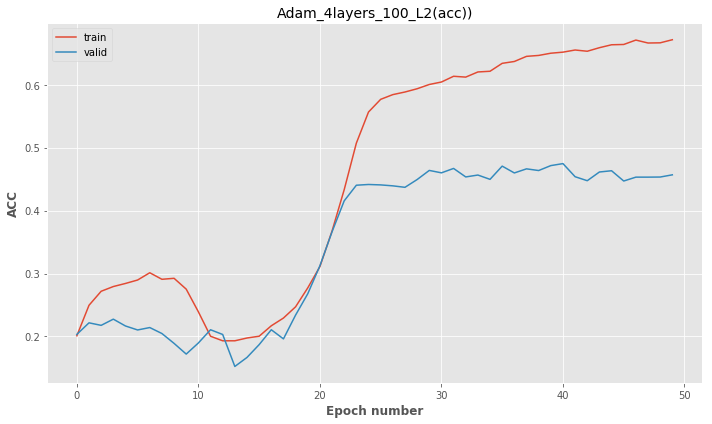

In [8]:
data = Adam_4layers_100_L2

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_100_L2(acc))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

In [9]:
n_hidden_1 = 200
n_hidden_2 = 200
n_hidden_3 = 200
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
#regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
#error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_200 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 23501.06 running acc average = 0.24
End of epoch 2: running error average = 9805.41 running acc average = 0.31
End of epoch 3: running error average = 6157.24 running acc average = 0.36
End of epoch 4: running error average = 4163.78 running acc average = 0.41
End of epoch 5: running error average = 3029.27 running acc average = 0.47
End of epoch 6: running error average = 2185.49 running acc average = 0.52
End of epoch 7: running error average = 1547.14 running acc average = 0.59
End of epoch 8: running error average = 1129.60 running acc average = 0.64
End of epoch 9: running error average = 800.08 running acc average = 0.69
End of epoch 10: running error average = 596.60 running acc average = 0.74
End of epoch 11: running error average = 428.68 running acc average = 0.77
End of epoch 12: running error average = 308.54 running acc average = 0.81
End of epoch 13: running error average = 225.66 running acc average = 0.84
End of epoch 14: running 

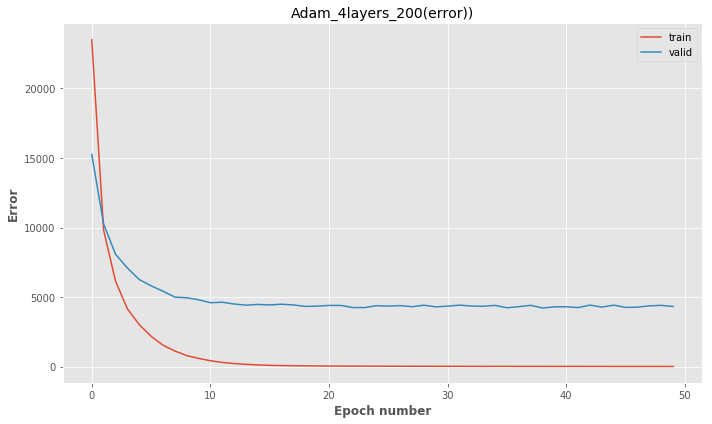

In [10]:
data = Adam_4layers_200

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200(error))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

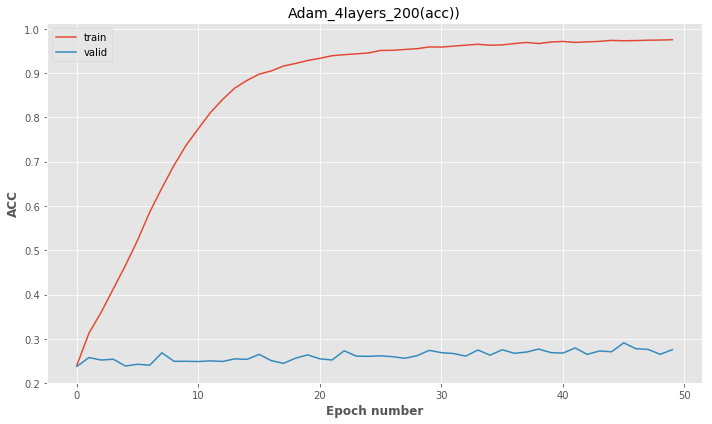

In [11]:
data = Adam_4layers_200

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200(acc))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

In [12]:
n_hidden_1 = 200
n_hidden_2 = 200
n_hidden_3 = 200
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['h3'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_200_L2 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 26215.03 running acc average = 0.24
End of epoch 2: running error average = 13471.06 running acc average = 0.31
End of epoch 3: running error average = 9739.86 running acc average = 0.36
End of epoch 4: running error average = 7654.67 running acc average = 0.41
End of epoch 5: running error average = 6433.40 running acc average = 0.46
End of epoch 6: running error average = 5550.89 running acc average = 0.52
End of epoch 7: running error average = 4909.68 running acc average = 0.59
End of epoch 8: running error average = 4442.11 running acc average = 0.64
End of epoch 9: running error average = 4084.34 running acc average = 0.69
End of epoch 10: running error average = 3822.50 running acc average = 0.74
End of epoch 11: running error average = 3648.53 running acc average = 0.78
End of epoch 12: running error average = 3507.78 running acc average = 0.81
End of epoch 13: running error average = 3389.66 running acc average = 0.84
End of epoch 14: ru

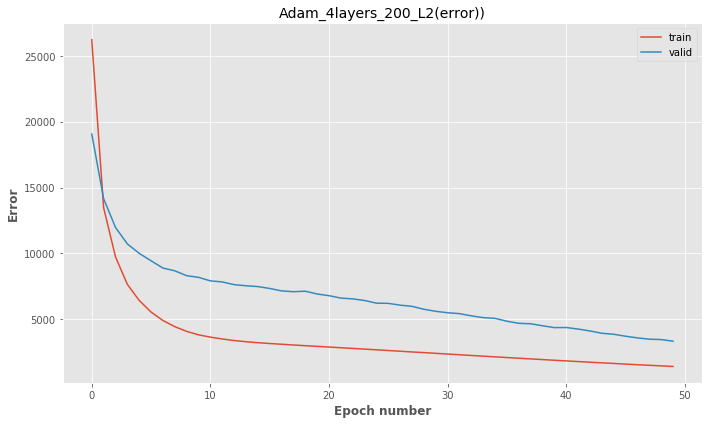

In [13]:
data = Adam_4layers_200_L2

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200_L2(error))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

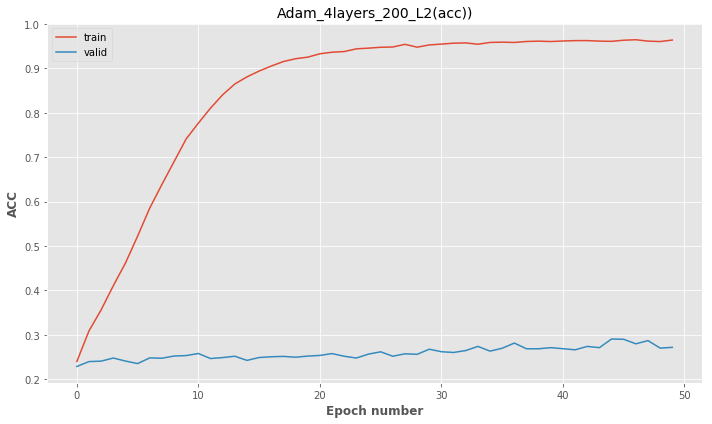

In [14]:
data = Adam_4layers_200_L2

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_200_L2(acc))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

In [15]:
n_hidden_1 = 300
n_hidden_2 = 300
n_hidden_3 = 300
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
#regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['out'])
#error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_300 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 41472.66 running acc average = 0.26
End of epoch 2: running error average = 17938.31 running acc average = 0.35
End of epoch 3: running error average = 11090.62 running acc average = 0.43
End of epoch 4: running error average = 7200.20 running acc average = 0.50
End of epoch 5: running error average = 4909.45 running acc average = 0.58
End of epoch 6: running error average = 3333.24 running acc average = 0.65
End of epoch 7: running error average = 2210.87 running acc average = 0.72
End of epoch 8: running error average = 1502.41 running acc average = 0.77
End of epoch 9: running error average = 986.68 running acc average = 0.82
End of epoch 10: running error average = 664.19 running acc average = 0.85
End of epoch 11: running error average = 440.43 running acc average = 0.88
End of epoch 12: running error average = 317.34 running acc average = 0.90
End of epoch 13: running error average = 238.36 running acc average = 0.92
End of epoch 14: runnin

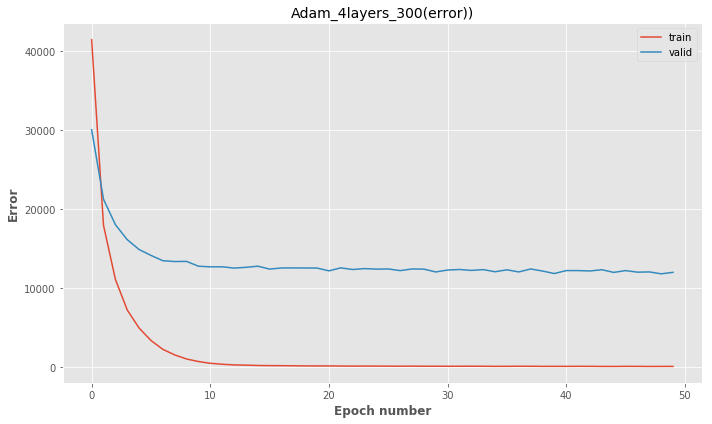

In [16]:
data = Adam_4layers_300

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300(error))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

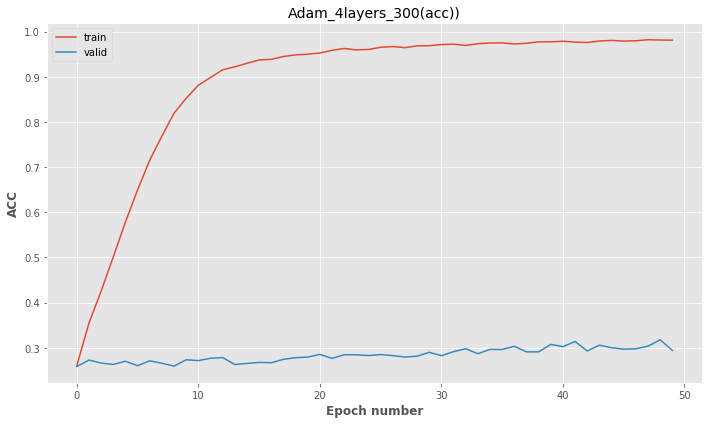

In [17]:
data = Adam_4layers_300

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300(acc))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

In [18]:
n_hidden_1 = 300
n_hidden_2 = 300
n_hidden_3 = 300
beta = 0.01

weights = {
    'h1': tf.Variable(tf.random_normal([3000, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([10]))
}
def multilayer_3hidden100(data):
    layer_1 = tf.nn.relu(tf.matmul(data, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer
out_layer = multilayer_3hidden100(inputs)

per_datapoint_errors = tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=targets)
error = tf.reduce_mean(per_datapoint_errors)
regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])+tf.nn.l2_loss(weights['h3'])+tf.nn.l2_loss(weights['out'])
error = tf.reduce_mean(error + beta * regularizer)

per_datapoint_pred_is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(per_datapoint_pred_is_correct, tf.float32))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()
sess.run(init_op)
import data_providers as data_providers
train_data = data_providers.MSD10GenreDataProvider('train', batch_size=50, flatten=True, one_hot=True)
valid_data = data_providers.MSD10GenreDataProvider('valid', batch_size=50, flatten=True, one_hot=True)

num_epoch = 50
error_train = []
error_valid = []
acc_train = []
acc_valid = []

for e in range(num_epoch):
    running_error = 0.
    running_acc = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_acc += batch_acc
    running_error /= train_data.num_batches
    running_acc /= train_data.num_batches
    print('End of epoch {0}: running error average = {1:.2f}'.format(e + 1, running_error), 
          'running acc average = {1:.2f}'.format(e + 1, running_acc))
    error_train = np.append(error_train, running_error)
    acc_train = np.append(acc_train, running_acc)
    a = get_error_and_accuracy(valid_data)
    error_valid = np.append(error_valid, a[0])
    acc_valid = np.append(acc_valid, a[1])
    
Adam_4layers_300_L2 = [error_train, acc_train, error_valid, acc_valid]

End of epoch 1: running error average = 43396.82 running acc average = 0.26
End of epoch 2: running error average = 21422.53 running acc average = 0.35
End of epoch 3: running error average = 15179.63 running acc average = 0.42
End of epoch 4: running error average = 11720.66 running acc average = 0.50
End of epoch 5: running error average = 9841.22 running acc average = 0.56
End of epoch 6: running error average = 8202.64 running acc average = 0.65
End of epoch 7: running error average = 7284.96 running acc average = 0.71
End of epoch 8: running error average = 6581.85 running acc average = 0.77
End of epoch 9: running error average = 6096.79 running acc average = 0.81
End of epoch 10: running error average = 5777.89 running acc average = 0.85
End of epoch 11: running error average = 5580.77 running acc average = 0.88
End of epoch 12: running error average = 5446.12 running acc average = 0.90
End of epoch 13: running error average = 5352.21 running acc average = 0.91
End of epoch 14: 

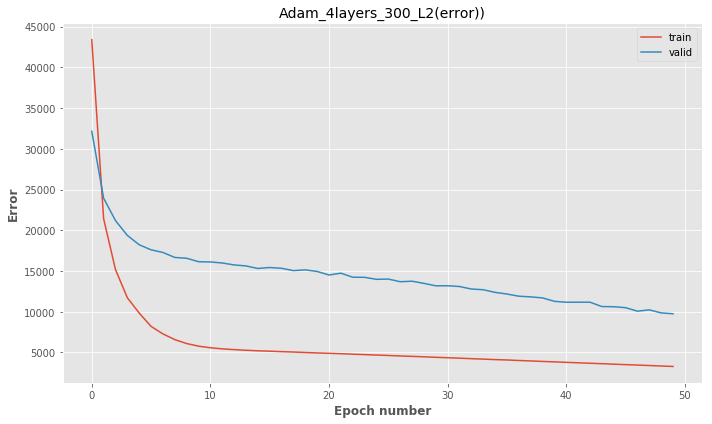

In [19]:
data = Adam_4layers_300_L2

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[0].shape[0]), data[0], label = 'train')
ax_1.plot(np.arange(data[2].shape[0]), data[2], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300_L2(error))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')

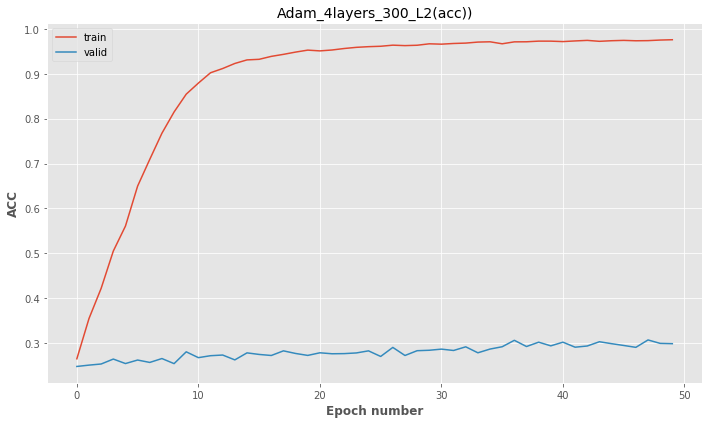

In [20]:
data = Adam_4layers_300_L2

fig_1 = plt.figure(figsize=(10,6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(np.arange(data[1].shape[0]), data[1], label = 'train')
ax_1.plot(np.arange(data[3].shape[0]), data[3], label = 'valid')
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('ACC', fontsize = 12, fontweight = 1000)
ax_1.set_title('Adam_4layers_300_L2(acc))', fontsize = 14)
plt.tight_layout()
#fig_1.savefig('.pdf')